# Homework #5  (Due 30 December 2024)

## Part-1

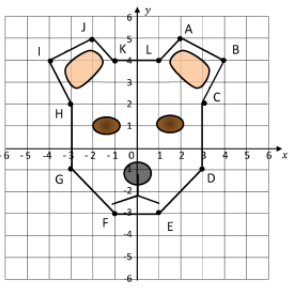

You will be applying a transformation on a set of points of the following image (50 points).
<br>
a) Find the matrix that represents a rotation of +30 degrees in homogeneous coordinates. Perform a rotation of +30 degrees on the points and plot them. <br>
b) Find the matrix that represents a translation of 4 units in x direction, 1 unit in y direction. Perform a translation in x of 4 units and a translation in y of 1 unit over the points previously rotated. Plot the new points.<br>
c) Find a transformation that represents the operation of rotation of +30 degrees after a translation of 4 units in x, 1 unit in y. Plot your points. <br>
d) Compare the results of (b) and (c). Are they the same? Write your comments.<br>
e) Apply +20 degrees rotation, (x,y)=[2,1] units of translation, -40 degrees rotation and (x,y)=[1,-2] units of translation in this order. But do not apply these separately. First obtain a single 3x3 transformation matrix T for all the operations given above. Then apply this T to the points once. Plot new points.

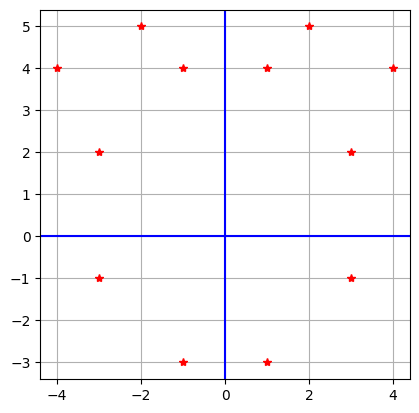

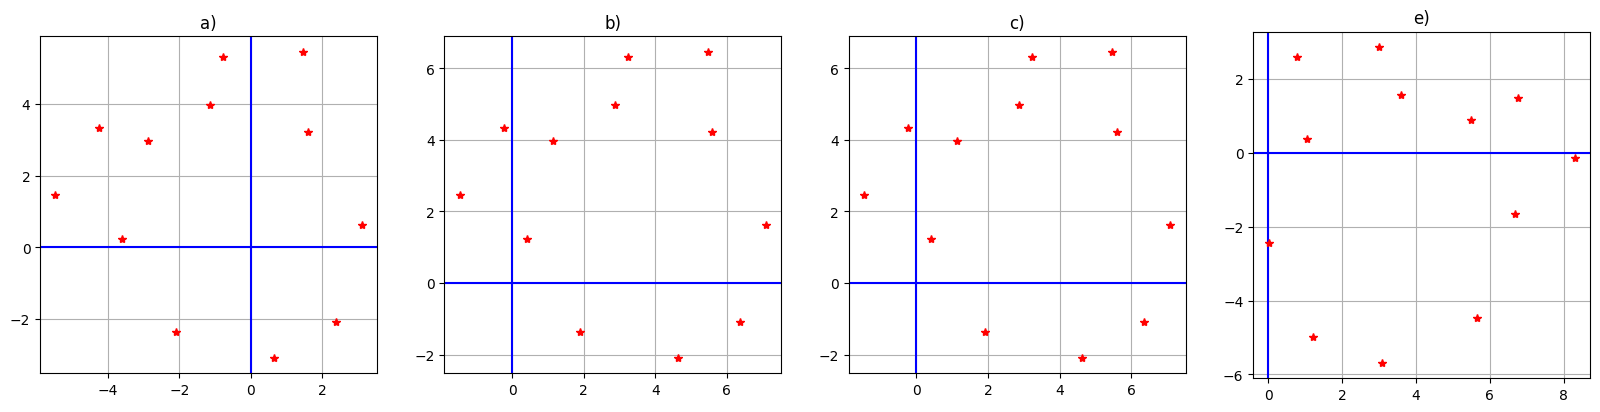

In [17]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,util
import cv2

# define your points as homogeneuos coordinates (3 coordinates).
points = np.array([[2,5,1],[4,4,1],[3,2,1],[3,-1,1],[1,-3,1],[-1,-3,1],[-3,-1,1],[-3,2,1],[-4,4,1],[-2,5,1],[-1,4,1],[1,4,1]], dtype=float)

# Make the points be in columns (you need to transpose them)
points = points.transpose()

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(points[0,:],points[1,:],'r*')

# a)
# define your rotation matrix here:
#R= np.array([[XX, XX, XX],[XX, XX, XX],[XX, XX, XX]])
R = [[np.cos(np.pi / 6), -np.sin(np.pi / 6), 0], [np.sin(np.pi / 6), np.cos(np.pi / 6), 0], [0, 0, 1]]

points_a = np.matmul(R, points)

fig, ax = plt.subplots(1, 4, figsize= (20, 5))
ax[0].clear()
ax[0].grid(True)
ax[0].set_aspect('equal')
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_title("a)")
ax[0].plot(points_a[0,:],points_a[1,:],'r*')

# b)
T = np.array([[1, 0, 4], [0, 1, 1], [0, 0, 1]])
points_b = np.matmul(T, points_a)

ax[1].clear()
ax[1].grid(True)
ax[1].set_aspect('equal')
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_title("b)")
ax[1].plot(points_b[0,:],points_b[1,:],'r*')

# c)
points_c = np.matmul(np.matmul(T, R), points)

ax[2].clear()
ax[2].grid(True)
ax[2].set_aspect('equal')
ax[2].axhline(0, color='blue')
ax[2].axvline(0, color='blue')
ax[2].set_title("c)")
ax[2].plot(points_c[0,:],points_c[1,:],'r*')

# d)
# Yes, output of b and c are same.

# e)
rad1 = np.deg2rad(20)
rad2 = np.deg2rad(-40)
R1 = np.array([[np.cos(rad1), -np.sin(rad1), 0], [np.sin(rad1), np.cos(rad1), 0], [0, 0, 1]])
T1 = np.array([[1,0,2], [0,1,1], [0,0,1]])
R2 = np.array([[np.cos(rad2), -np.sin(rad2), 0], [np.sin(rad2), np.cos(rad2), 0], [0, 0, 1]])
T2 = np.array([[1,0,1], [0,1,-2], [0,0,1]])

T_final = np.matmul(T2, np.matmul(R2, np.matmul(T1, R1)))

points_e = np.matmul(T_final, points)

ax[3].clear()
ax[3].grid(True)
ax[3].set_aspect('equal')
ax[3].axhline(0, color='blue')
ax[3].axvline(0, color='blue')
ax[3].set_title("e)")
ax[3].plot(points_e[0,:],points_e[1,:],'r*')


## Part-2

Now you will estimate the homography between a pair of images (50 points).

In our case, the transformation is a homography: $p’=Hp$,
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1). <br>

a) Take four corresponding points from the given images (img1.png and img2.png) and plot them on the images. <br>

b) Construct matrix $A$ for the following formulation $Ah=0$. <br>


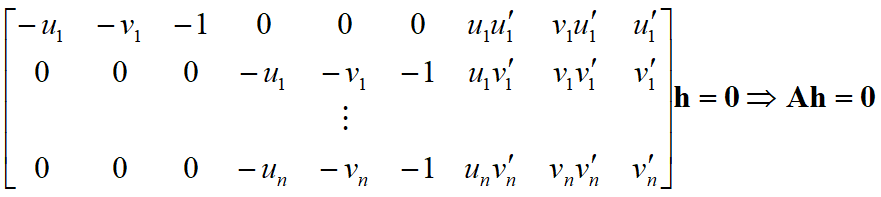



c) Apply SVD (singular value decomposition) using np.linalg.svd and obtain $h$. Then reshape $h$ to obtain 3x3 homography matrix $H$. <br>

d) Test your estimated $H$. Select 3 new different points manually from the first image. Apply $H$ to them. And plot the results in the second image. Do they fall on the correct/corresponding locations? Write your comments.
<br>

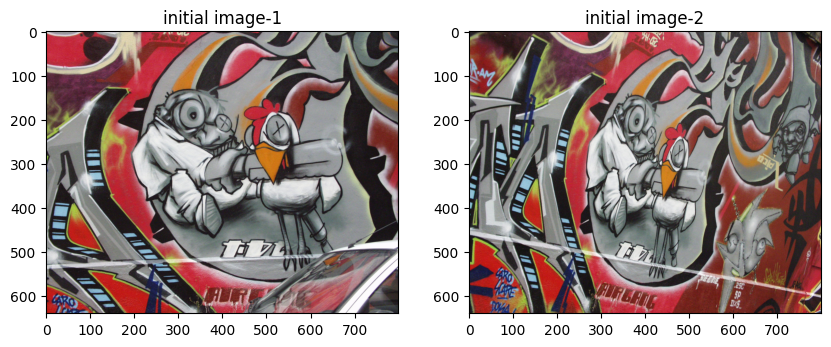

In [18]:
img1_url = "https://raw.githubusercontent.com/furkanulucay/imageWarping/main/img1.png"
img2_url = "https://raw.githubusercontent.com/furkanulucay/imageWarping/main/img2.png"

img1 = io.imread(img1_url)
img2 = io.imread(img2_url)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].set_title("initial image-1")
ax[0].imshow(img1, cmap="gray")

ax[1].set_title("initial image-2")
ax[1].imshow(img2)

#a-)

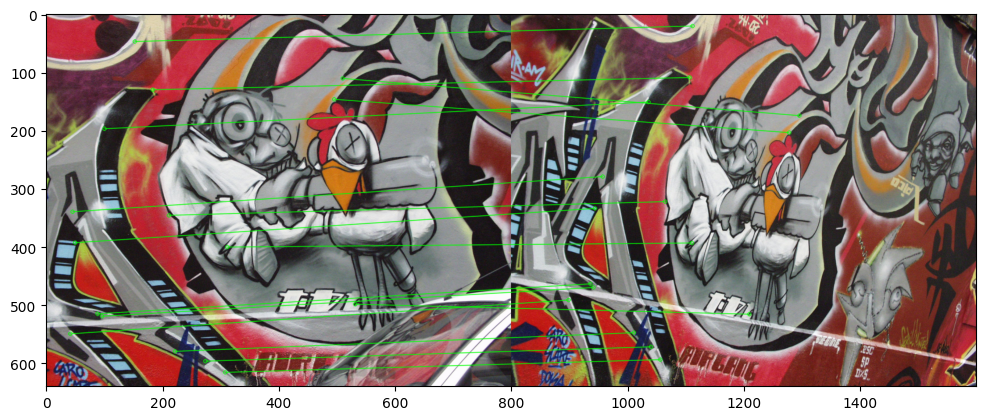

(<matplotlib.image.AxesImage at 0x7e6fad714e50>, None)

In [19]:
img1_gray = cv2.cvtColor(img1.copy(), cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2.copy(), cv2.COLOR_BGR2GRAY)

all_points1 = []
all_points2 = []

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1_gray.copy(), None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2_gray.copy(), None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.4*n.distance:
        good.append(m)

for match in good:
    img1_idx = match.queryIdx
    img2_idx = match.trainIdx

    (x1, y1) = keypoints_1[img1_idx].pt
    (x2, y2) = keypoints_2[img2_idx].pt

    all_points1.append((int(round(x1)), int(round(y1))))
    all_points2.append((int(round(x2)), int(round(y2))))


draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   flags = 2)

img3 = cv2.drawMatches(img1.copy(),keypoints_1,img2.copy(),keypoints_2,good,None,**draw_params)
plt.figure(figsize = (12,6))
plt.imshow(img3, 'gray'),plt.show()

All Points-1= [(41, 550), (45, 341), (50, 394), (88, 516), (96, 520), (100, 198), (152, 48), (183, 131), (211, 347), (222, 580), (274, 597), (308, 616), (312, 401), (495, 148), (510, 112), (531, 499)]
All Points-2= [(98, 492), (157, 280), (144, 335), (136, 464), (141, 470), (236, 152), (312, 22), (307, 110), (265, 323), (211, 548), (240, 572), (256, 594), (311, 394), (478, 205), (496, 176), (410, 516)]
Selected Points-1= [[100 198]
 [510 112]
 [312 401]
 [211 347]]
Selected Points-2= [[236 152]
 [496 176]
 [311 394]
 [265 323]]


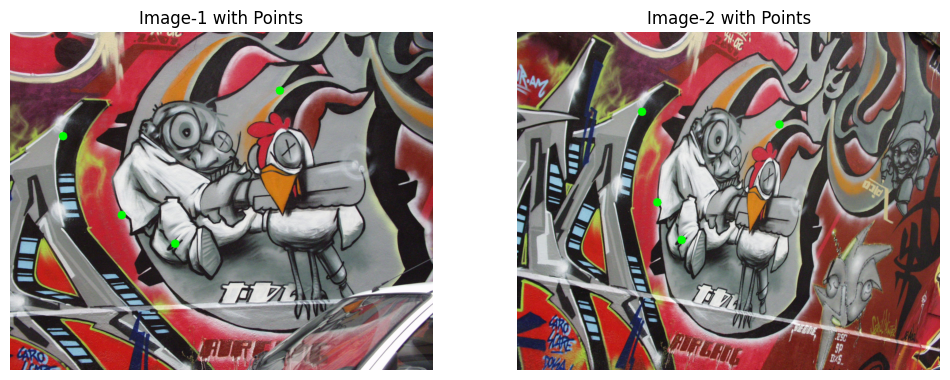

In [20]:
img1_with_points = img1.copy()
img2_with_points = img2.copy()

print(f'All Points-1= {all_points1}')
print(f'All Points-2= {all_points2}')

points1 = np.array([[100, 198], [510, 112], [312, 401], [211, 347]])
points2 = np.array([[236, 152], [496, 176], [311, 394], [265, 323]])

print(f'Selected Points-1= {points1}')
print(f'Selected Points-2= {points2}')

for (x, y) in points1:
    cv2.circle(img1_with_points, (x, y), radius=8, color=(0, 255, 0), thickness=-1)

for (x, y) in points2:
    cv2.circle(img2_with_points, (x, y), radius=8, color=(0, 255, 0), thickness=-1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1_with_points)
plt.title("Image-1 with Points")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_with_points)
plt.title("Image-2 with Points")
plt.axis("off")
plt.show()

I took these four corresponding points.

#b-)

In [21]:
A = []
for (x, y), (x_prime, y_prime) in zip(points1, points2):
    A.append([-x, -y, -1, 0, 0, 0, x * x_prime, y * x_prime, x_prime])
    A.append([0, 0, 0, -x, -y, -1, x * y_prime, y * y_prime, y_prime])

A = np.array(A)
print("Matrix A:")
print(A)

Matrix A:
[[  -100   -198     -1      0      0      0  23600  46728    236]
 [     0      0      0   -100   -198     -1  15200  30096    152]
 [  -510   -112     -1      0      0      0 252960  55552    496]
 [     0      0      0   -510   -112     -1  89760  19712    176]
 [  -312   -401     -1      0      0      0  97032 124711    311]
 [     0      0      0   -312   -401     -1 122928 157994    394]
 [  -211   -347     -1      0      0      0  55915  91955    265]
 [     0      0      0   -211   -347     -1  68153 112081    323]]


#c-)

In [22]:
U, S, Vh = np.linalg.svd(A)

H = Vh[-1].reshape((3,3))

print("Matrix H:")
print(H)

Matrix H:
[[ 3.05274733e-03 -1.14470966e-03  9.43677981e-01]
 [ 1.35199518e-03  4.31324847e-03 -3.30792077e-01]
 [ 1.14786981e-06  2.25579053e-07  4.17232888e-03]]


#d-)

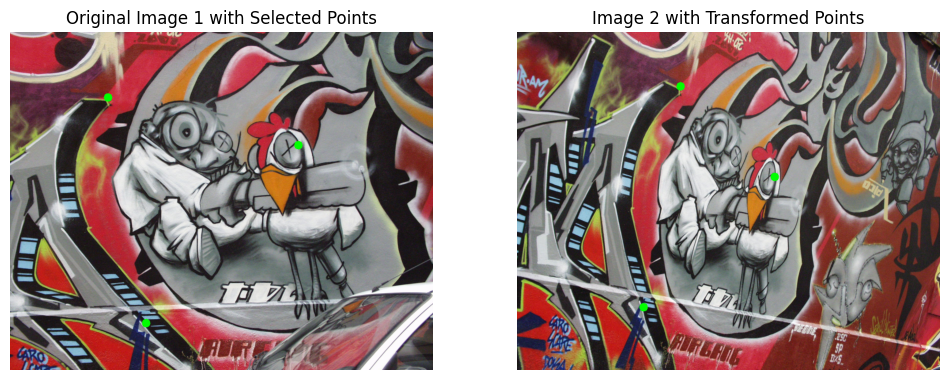

In [23]:
new_points_img1 = [(545, 215), (257, 551), (185, 125)]

transformed_points = []
for x, y in new_points_img1:
    p = np.array([x, y, 1])
    p_prime = np.matmul(H, p)
    p_prime = p_prime/p_prime[2]
    transformed_points.append((int(round(p_prime[0])), int(round(p_prime[1]))))

img1_with_points = img1.copy()
img2_with_transformed_points = img2.copy()

for (x, y) in new_points_img1:
    cv2.circle(img1_with_points, (x, y), radius=8, color=(0,255,0), thickness=-1)

for (x, y) in transformed_points:
    cv2.circle(img2_with_transformed_points, (x, y), radius=8, color=(0,255,0), thickness=-1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img1_with_points)
plt.title("Original Image 1 with Selected Points")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_with_transformed_points)
plt.title("Image 2 with Transformed Points")
plt.axis("off")

plt.show()


Transformed points fall on the correct locations.